# Feature Selection - Linear and Logistic Regression Coefficient For Feature Selection

#### Linear Regression
Let’s first understand what exactly linear regression is, it is a straight forward approach to predict the response y on the basis of different prediction variables such x and ε. . There is a linear relation between x and y.

𝑦𝑖 = 𝛽0 + 𝛽1.𝑋𝑖 + 𝜀𝑖

 - y = dependent variable
 - β0 = population of intercept
 - βi = population of co-efficient
 - x = independent variable
 - εi= Random error

#### Basic Assumptions
 - Linear relationship with the target y
 - Feature space X should have gaussian distribution
 - Features are not correlated with other
 - Features are in same scale i.e. have same variance
 
#### Lasso (L1) and Ridge (L2) Regularization
Regularization is a technique to discourage the complexity of the model. It does this by penalizing the loss function. This helps to solve the overfitting problem.

 - L1 regularization (also called Lasso)
 - It shrinks the co-efficients which are less important to zero. That means with Lasso regularization we can remove some features.
 - L2 regularization (also called Ridge)
 - It does’t reduce the co-efficients to zero but it reduces the regression co-efficients with this reduction we can identofy which feature has more important.
 - L1/L2 regularization (also called Elastic net)
 - A regression model that uses L1 regularization technique is called Lasso Regression and model which uses L2 is called Ridge Regression.

#### What is Lasso Regularisation

3 sources of error

 - ##### Noise:
 
We can’t do anything with the noise. Let’s focus on following errors.

 - ##### Bias error:
 
It is useful to quantify how much on an average are the predicted values different from the actual value.

 - ##### Variance:
 
On the other side quantifies how are the prediction made on the same observation different from each other.
Now we will try to understand bias - variance trade off from the following figure.
By increasing model complexity, total error will decrease till some point and then it will start to increase. W need to select optimum model complexity to get less error.

If you are getting high bias then you have a fair chance to increase model complexity. And otherside it you are getting high variance, you need to decrease model complexity that’s how any machine learning algorithm works.

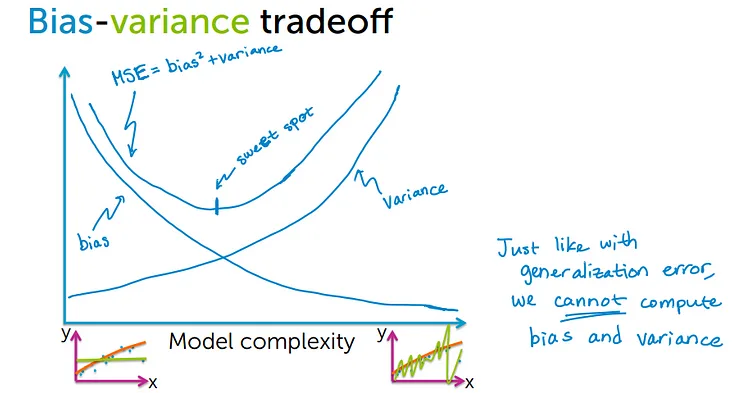

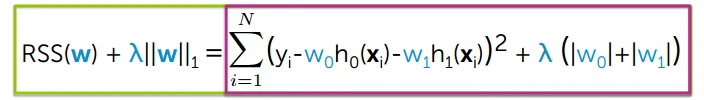

The L1 regularization adds a penalty equal to the sum of the absolute value of the coefficients.

We can observe from the following figure. The L1 regularization will shrink some parameters to zero. Hence some variables will not play any role in the model to get final output, L1 regression can be seen as a way to select features in a model.

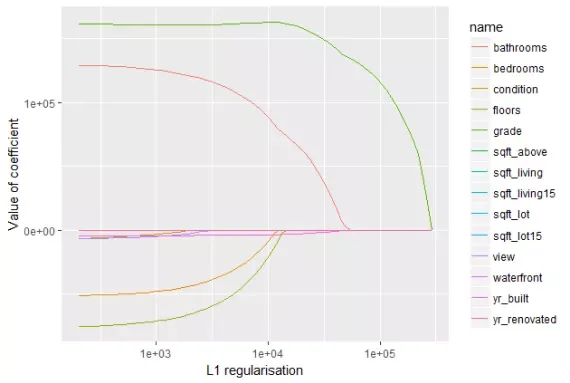

Let’s observe the evolution of test error by changing the value of λ from the following figure.

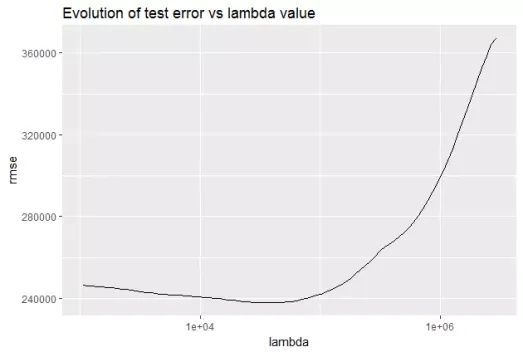

#### How to choose λ
Let’s move ahead and choose the best λ.

We have a sufficient amount of data. In that we can split our data into 3 sets those are

 - Training set
 - Validation set
 - Test set

In the training set, we fit our model and set regression co-efficients with the regularization.
Then we test our model’s performance to select λ
on validation set, if any thing wrong with the model like less accuracy we validate on the validation set then we change the parameter the we go back to the training set and so the optimization.
Finally, it will do generalize testing on the test set.

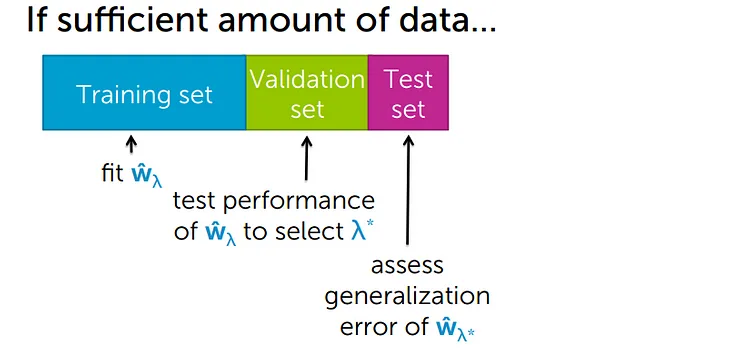

#### What is Ridge Regularisation
Let’s first understand what exactly Ridge regularization:

The L2 regularization adds a penalty equal to the sum of the squared value of the coefficients.

λ is the tuning parameter or optimization parameter.
w is the regression co-efficient.

In this regularization,
if λ is high then we will get high bias and low variance.
if λ is low then we will get low bias and high variance

So what we do we will find out the optimized value of λ by tuning the parameters. And we can say λ is the strength of the regularization.

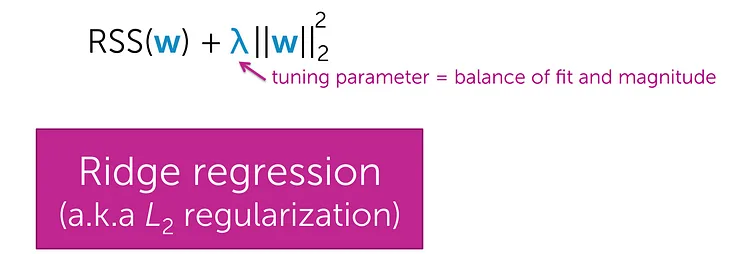

The L2 regularization will force the parameters to be relatively small, the bigger the penalization, the smaller (and the more robust) the coefficients are.

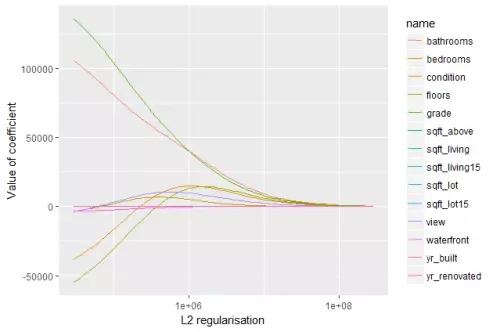

#### Difference between L1 and L2 regularization
Let’s discuss the difference between L1 and L2 regularization:

|L1 Regularization	| L2 Regularization|
|-------------------|------------------|
|It penalizes sum of absolute value of weights	| It regularization penalizes sum of square weights|
|It has a sparse solution	| It has a non sparse solution|
|It has multiple solutions	| It has one solution|
|It has built in feature selection	| It has no feature selection|
|It is robust to outliers	|It is not robust to outliers|
|It generates model that are simple and interpretable but cannot learn complex patterns	| It gives better prediction when output variable is a function of all input features|


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, LogisticRegression

In [ ]:
titanic = sns.load_dataset("titanic")
titanic.head()

In [ ]:
# Checking for null values
titanic.isnull().sum()

In [ ]:
# Dropping the columns with null values.
titanic.drop(labels=["age", "deck"], axis=1, inplace=True)

In [ ]:
titanic = titanic.dropna()

In [ ]:
# NaN and Null are removed
titanic.isnull().sum()

In [ ]:
data = titanic[["pclass", "sex", "sibsp", "parch", "embarked", "who", "alone"]].copy()

In [ ]:
data.head()

In [ ]:
data.isnull().sum()

In [ ]:
# Convertimg String to Number
sex = {"male": 0, "female": 1}
data["sex"] = data["sex"].map(sex)

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data["embarked"] = data["embarked"].map(ports)

In [ ]:
who = {"man": 0, "woman": 1, "child": 2}
data["who"] = data["who"].map(who)

In [ ]:
alone = {False: 0, True: 1}
data["alone"] = data["alone"].map(alone)

In [ ]:
data.head()

In [ ]:
x = data.copy()
y = titanic["survived"]
x.shape, y.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## Estimate Coefficient of Linear Regression

In [ ]:
sel = SelectFromModel(LinearRegression())

In [ ]:
sel.fit(x_train, y_train)

In [ ]:
# Coefficient
np.abs(sel.estimator_.coef_)

In [ ]:
# Mean
np.mean(np.abs(sel.estimator_.coef_))

In [ ]:
# True is selected and False is not selected.
# The way it selectes is if the coefficient is less than the mean it will select the feature. As you can see above.
sel.get_support()

In [ ]:
features = x_train.columns[sel.get_support()]
features

In [ ]:
x_train_reg = sel.transform(x_train)
x_test_reg = sel.transform(x_test)

In [ ]:
x_train_reg.shape, x_test_reg.shape

In [ ]:
def run_random_forest(x_train, x_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print("Accuracy on test set: ")
    print(accuracy_score(y_test, y_pred))

In [ ]:
%%time
# Transformed Dataset
run_random_forest(x_train_reg, x_test_reg, y_train, y_test)

In [ ]:
%%time
# Original Dataset
run_random_forest(x_train, x_test, y_train, y_test)

## Logistic Regression Coefficient with L1

In [ ]:
# penalty="l1"
sel = SelectFromModel(LogisticRegression(penalty="l1", C=0.1, solver="liblinear"))
sel.fit(x_train, y_train)
sel.get_support()

In [ ]:
# Tche feature which is not important will have coefficient as 0.
np.abs(sel.estimator_.coef_)

In [ ]:
x_train_l1 = sel.transform(x_train)
x_test_l1 = sel.transform(x_test)

In [ ]:
%%time
# Transformed Dataset
run_random_forest(x_train_l1, x_test_l1, y_train, y_test)

## L2 Regularization

In [ ]:
# penalty="l2"
sel = SelectFromModel(LogisticRegression(penalty="l2", C=0.1, solver="liblinear"))
sel.fit(x_train, y_train)
sel.get_support()

In [ ]:
# Tche feature which is not important will have coefficient as 0.
np.abs(sel.estimator_.coef_)

In [ ]:
x_train_l1 = sel.transform(x_train)
x_test_l1 = sel.transform(x_test)

In [ ]:
%%time
# Transformed Dataset
run_random_forest(x_train_l1, x_test_l1, y_train, y_test)